In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL.Image as Image
import utils
from pathlib import Path
import random

In [2]:
# Pruebo una transformacion simple
simple_transform = transforms.Compose([
    # Ajusto para que todas las imagenes tengan el mismo tamaño
    transforms.Resize(size=(224, 224)),
    # Hago una transformacion horizontal con una probabilidad del 50%
    transforms.RandomHorizontalFlip(p=0.5),
    # Convierto el output a un tensor
    transforms.ToTensor()
])

In [3]:
train_data = datasets.ImageFolder(
    root='data/image_classification/train',
    transform=simple_transform,
    target_transform=None)

In [4]:
# Set up path data to folder
data_path = Path("data/image_classification/train")

In [5]:
# 1. Get all image paths (* means "any combination")
image_path = data_path / 'imagenes'
image_path_list = list(data_path.glob("*/*.jpg"))

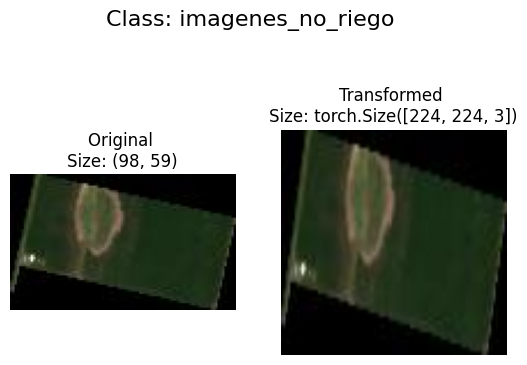

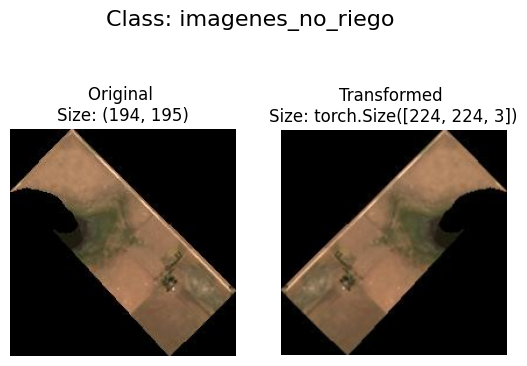

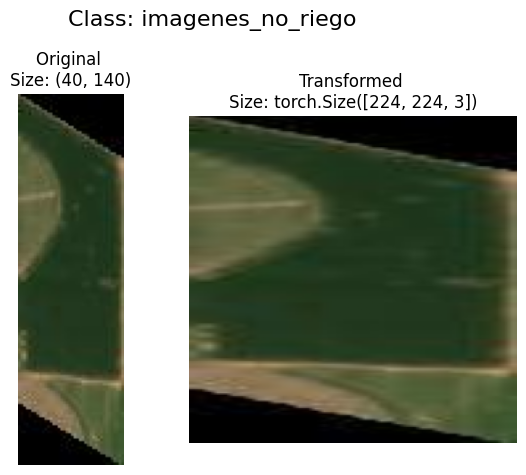

In [7]:
utils.plot_transformed_images(image_path_list, simple_transform, n=3, seed=42)
plt.tight_layout()

In [8]:
# Pruebo una transformacion mas compleja
complex_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

In [9]:
# Tomo una imagen cualquiera
imagen = Image.open(r'data\image_classification\test\imagenes_riego\S2A_20HQD_20210113_0_L2A_10308000000000000000000000000000000082200B.jpg')

Text(0.5, 1.0, 'Transformada')

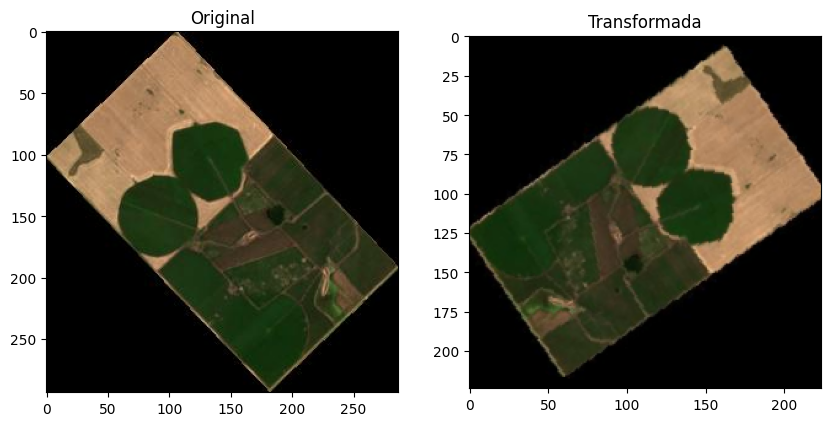

In [19]:
img = complex_transform(imagen)
f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(imagen)
ax[0].set_title('Original')
ax[1].imshow(img.permute(1,2,0))
ax[1].set_title('Transformada')

In [12]:
# Pruebo otras transformaciones que pueden llegar a servir
# 1-Random rotation
# 2-GaussianBlur
# 3-Random Affine
# 4-Random Vertical Flip

In [13]:
# Pruebo otras transformaciones que pueden llegar a servir
# 1-Random rotation
random_rotation = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.ToTensor()
])
# 2-GaussianBlur
gau_blur = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 5)),
    transforms.ToTensor()
])
# 3-Random Affine
random_affine = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.2), scale=(0.6, 0.95)),
    transforms.ToTensor()
])

# 4-Random Horizontal Flip
vertical_flip = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms. RandomVerticalFlip(p=1),
    transforms.ToTensor()
])

Text(0.5, 1.0, 'Transformada')

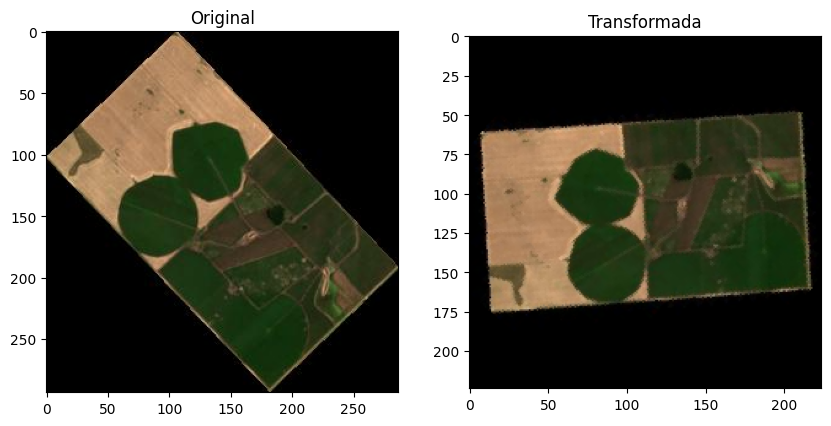

In [19]:
# Vertical_flip
img = random_rotation(imagen)
f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(imagen)
ax[0].set_title('Original')
ax[1].imshow(img.permute(1,2,0))
ax[1].set_title('Transformada')

In [33]:
# Hago un listado de transformaciones
transformaciones = [complex_transform, random_rotation, gau_blur, random_affine, vertical_flip]

In [21]:
# Seteo un custom dataset para usar las transformaciones solo en las clases positivas
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, positive_class_label):
        self.dataset = dataset
        self.positive_class_label = positive_class_label
        self.filtered_idx = [idx for idx, (_, label) in enumerate(self.dataset) if label == self.positive_class_label]
    
    def __getitem__(self, idx):
        return self.dataset[self.filtered_idx[idx]]
    
    def __len__(self):
        return len(self.filtered_idx)

In [23]:
positive_images = CustomDataset(train_data, 1)

In [33]:
# Necesito alrededor de 300 imagenes para el dataset de entrenamiento
# Genero 300 imagenes sampleando entre transformaciones
# Para cada transformacion, genero 60 imagenes
# Seteo una semilla para que los resultados sean reproducibles
random.seed(42)
# Itero 60 veces para cada transformacion
for trans in transformaciones:
    for i in range(60):
        idx = random.randint(0, len(positive_images))
        img_trans = trans(positive_images[idx])

SyntaxError: unexpected EOF while parsing (4030944831.py, line 5)

In [30]:
# Me quedo solo con las imagenes de riego para el entrenamiento
train_data_pos = datasets.ImageFolder(root='data/image_classification/train',
                                      transform=complex_transform,
                                      target_transform=None)

0

In [36]:
positive_images = [image for image in train_data_pos if image[1] == 1]